In [1]:
import pandas as pd


df = pd.read_csv('rating_small.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [2]:
# df.info(memory_usage="deep")
# df.memory_usage()
# df.describe()

In [3]:
# parse the timestamp because it's currently an object
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Double check it's been parse correctly
df.timestamp.dtype

dtype('<M8[ns]')

In [4]:
# Calculate load per year and reset index. "A" is annual
load_per_year = df.groupby(pd.Grouper(key="timestamp", freq="A")).count()
load_per_year.reset_index(inplace=True)

# check type of timestamp
print(load_per_year.dtypes)
print(load_per_year)

timestamp    datetime64[ns]
userId                int64
movieId               int64
rating                int64
dtype: object
    timestamp  userId  movieId  rating
0  1996-12-31  158731   158731  158731
1  1997-12-31   72424    72424   72424
2  1998-12-31   37856    37856   37856
3  1999-12-31  125081   125081  125081
4  2000-12-31  197620   197620  197620
5  2001-12-31  130327   130327  130327
6  2002-12-31   86918    86918   86918
7  2003-12-31  111764   111764  111764
8  2004-12-31  116576   116576  116576
9  2005-12-31  193914   193914  193914
10 2006-12-31  117550   117550  117550
11 2007-12-31  109859   109859  109859
12 2008-12-31  119815   119815  119815
13 2009-12-31   85159    85159   85159
14 2010-12-31   92660    92660   92660
15 2011-12-31   73014    73014   73014
16 2012-12-31   76455    76455   76455
17 2013-12-31   53970    53970   53970
18 2014-12-31   51141    51141   51141
19 2015-12-31   23603    23603   23603


In [5]:
# double check that 1995 really has only 4 entries in LARGE df
df[(df['timestamp'] > '1995-01-01 00:00:00') & (df['timestamp'] < '1996-01-01 00:00:00')]

,userId,movieId,rating,timestamp


In [6]:
# remove 1995 from load_per_year dataframe because it's confirmed to only have 4 entries in the large
# dataset and 2016 because that data was only collected until March 31,2015
load_per_year = load_per_year.iloc[1:20,:] # you used same variable to avoid slice on copy warning
load_per_year

,timestamp,userId,movieId,rating
1,1997-12-31,72424,72424,72424
2,1998-12-31,37856,37856,37856
3,1999-12-31,125081,125081,125081
4,2000-12-31,197620,197620,197620
5,2001-12-31,130327,130327,130327
6,2002-12-31,86918,86918,86918
7,2003-12-31,111764,111764,111764
8,2004-12-31,116576,116576,116576
9,2005-12-31,193914,193914,193914
10,2006-12-31,117550,117550,117550


In [7]:
# convert timestamp back to string and keep only the year label
load_per_year["timestamp"] = load_per_year["timestamp"].dt.strftime("%Y")

In [8]:
# check that the date is an object again
load_per_year.dtypes

timestamp    object
userId        int64
movieId       int64
rating        int64
dtype: object

In [9]:
######################################
# if you wanted to re-index the dataframe
# load_per_year.reset_index(inplace=True)
# load_per_year

In [10]:
# keep timestamp and one other columns for keeping track of the entries count
load_per_year.drop(['movieId', 'rating'], axis=1, inplace=True)

In [11]:
# rename time grouping and the other column to a count label
load_per_year.rename(columns = {"timestamp": "year collected", "userId": "number of entries"}, inplace=True)
load_per_year

,year collected,number of entries
1,1997,72424
2,1998,37856
3,1999,125081
4,2000,197620
5,2001,130327
6,2002,86918
7,2003,111764
8,2004,116576
9,2005,193914
10,2006,117550


In [12]:
# final step is convert to list of dictionaries for the API. Call the list loads because your endpoint it /loads
loads = load_per_year.to_dict("records")
type(loads)

list

In [13]:
# calculate min,max,standard dev, and average and make sure they're all integers for the API
year_max = int(load_per_year.max()[1])

year_min = int(load_per_year.min()[1])

standard_dev_loads = int(load_per_year.std()[0])

average_load = int(load_per_year.mean()[1])
 

print(year_max)
print(year_min)
print(standard_dev_loads)
print(average_load)

type(year_min)

197620
23603
45808
98721


int

In [14]:
# make a dictionary of all the stats together
# use defaultdict to make an empty dict
from collections import defaultdict

statistics = defaultdict(dict)  # makes an empty dictionary
statistics["loads per year"] = loads
statistics["max load per year"] = year_max
statistics["min load per year"] = year_min
statistics["standard deviation of loads per year"] = standard_dev_loads
statistics["average loads per year"] = average_load

statistics

defaultdict(dict,
            {'average loads per year': 98721,
             'loads per year': [{'number of entries': 72424,
               'year collected': '1997'},
              {'number of entries': 37856, 'year collected': '1998'},
              {'number of entries': 125081, 'year collected': '1999'},
              {'number of entries': 197620, 'year collected': '2000'},
              {'number of entries': 130327, 'year collected': '2001'},
              {'number of entries': 86918, 'year collected': '2002'},
              {'number of entries': 111764, 'year collected': '2003'},
              {'number of entries': 116576, 'year collected': '2004'},
              {'number of entries': 193914, 'year collected': '2005'},
              {'number of entries': 117550, 'year collected': '2006'},
              {'number of entries': 109859, 'year collected': '2007'},
              {'number of entries': 119815, 'year collected': '2008'},
              {'number of entries': 85159, 'year colle

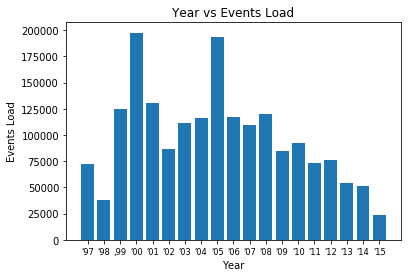

In [15]:
####### GRAPH ##########################
########################################

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

int_load = load_per_year.iloc[:, :2]

plt.bar(range(len(int_load['number of entries'])), int_load['number of entries'])
plt.xticks(range(len(int_load['year collected'])),["'97","'98",",99","'00","'01","'02","'03","'04","'05","'06","'07",
                                              "'08","'09","'10","'11","'12","'13","'14","'15"], size='small')
plt.xlabel("Year")
plt.ylabel("Events Load")
plt.title("Year vs Events Load")
plt.show()

# Make API

In [16]:
from flask import Flask, jsonify, make_response

# create app from Flask class which gives each file a unique name
app = Flask(__name__) 

In [17]:
# Make request decorator that fires after the request is made so all requests get the the custom header
@app.after_request
def after_request(response):
    response.headers["X-Service_Version"] = "v0.1.0"
    return response

In [18]:
# GET /statistics
@app.route("/statistics") 
def get_statistics():
    return jsonify({"statistics": statistics})

In [19]:
# GET /statistics/loads
@app.route("/statistics/loads") 
def get_statistics_loads():
    return jsonify({"loads per year": loads})

In [20]:
# GET /statistics/loads/avg
@app.route("/statistics/loads/avg")
def get_statistics_avg():
    return jsonify({"average loads per year": average_load})

In [21]:
# GET /statistics/loads/stddev
@app.route("/statistics/loads/stddev") 
def get_statistics_sttdev():
    return jsonify({"standard deviation of loads per year": standard_dev_loads})

In [22]:
# GET /statistics/loads/min
@app.route("/statistics/loads/min")
def get_statistics_min():
    return jsonify({"min load per year": year_min})

In [23]:
# GET /statistics/loads/max
@app.route("/statistics/loads/max")
def get_statistics_max():
    return jsonify({"max per year": year_max})

In [ ]:
# GET /statistics/loads/<string:name>   # returns message that the desired calculation does not exist
@app.route('/statistics/loads/<string:name>')
def get_not_performed_message(name):
    if name not in ("loads", "avg", "min", "max"):
        return jsonify({"message": "calculation not performed"})

In [ ]:
app.run(port=5000)

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
